In [82]:
import yfinance as yf

df = yf.download('SPY')
print(df.head())

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open   Volume
Ticker            SPY        SPY        SPY        SPY      SPY
Date                                                           
1993-01-29  24.452522  24.469914  24.348173  24.469914  1003200
1993-02-01  24.626421  24.626421  24.469897  24.469897   480500
1993-02-02  24.678596  24.695988  24.556856  24.609030   201300
1993-02-03  24.939489  24.956881  24.696008  24.713399   529400
1993-02-04  25.043842  25.096017  24.748186  25.026451   531500


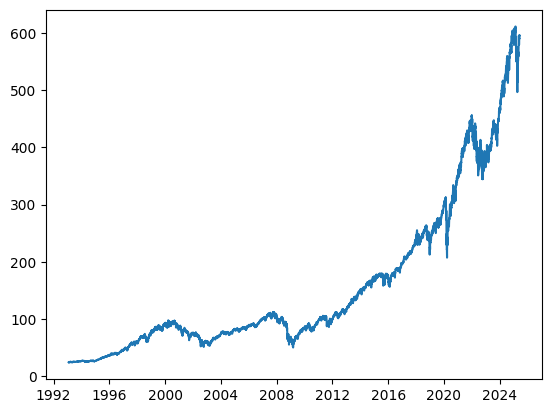

In [83]:
import matplotlib.pyplot as plt

plt.plot(df['Close'])

In [84]:
df['MovingAvg'] = df['Close'].rolling(50).mean()
df

Price,Close,High,Low,Open,Volume,MovingAvg
Ticker,SPY,SPY,SPY,SPY,SPY,
Date,,,,,,
1993-01-29,24.452522,24.469914,24.348173,24.469914,1003200,NaN
1993-02-01,24.626421,24.626421,24.469897,24.469897,480500,NaN
1993-02-02,24.678596,24.695988,24.556856,24.609030,201300,NaN
1993-02-03,24.939489,24.956881,24.696008,24.713399,529400,NaN
1993-02-04,25.043842,25.096017,24.748186,25.026451,531500,NaN
...,...,...,...,...,...,...
2025-05-30,589.390015,591.130005,583.239990,588.929993,90601200,558.742881
2025-06-02,592.710022,592.789978,585.059998,587.760010,61630500,559.321201


[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'SPY Close Vs. Moving Average')

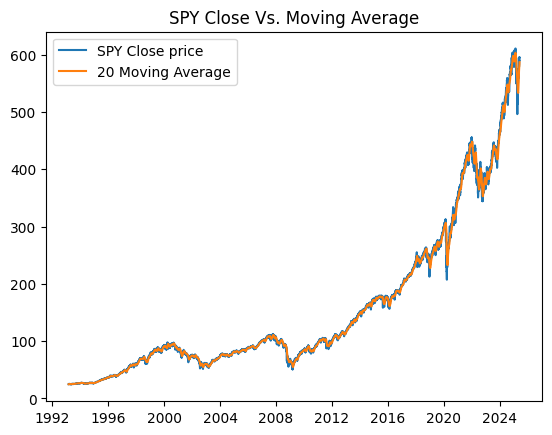

In [85]:
TICKER = 'SPY'
WINDOW = 20

df = yf.download(TICKER)
df['MovingAvg'] = df['Close'].rolling(WINDOW).mean()

# df.iloc[-100:, :] # last 100 rows
df = df.dropna()

plt.plot(df['Close'])
plt.plot(df['MovingAvg'])
plt.legend([f'{TICKER} Close price', f'{WINDOW} Moving Average'])
plt.title(f'{TICKER} Close Vs. Moving Average')

In [ ]:
import numpy as np

df.columns = df.columns.get_level_values(0)

def add_ma_strategy(df):

    df['Strategy'] = np.where(df['Close'] > df['MovingAvg'], 1, -1)
    return df

df = add_ma_strategy(df)
df['asset_cumulative'] = np.cumprod(1 + df['Close'].pct_change()) -1
df['strategy_cumulative'] = np.cumprod

df

Price,Close,High,Low,Open,Volume,MovingAvg,Strategy,asset_cumulative
Date,,,,,,,,
1993-02-26,24.713388,24.730780,24.591648,24.730780,66200,24.639475,1,NaN
1993-03-01,24.643829,24.800353,24.609046,24.800353,66500,24.649041,-1,-0.002815
1993-03-02,25.009041,25.009041,24.626427,24.661210,182400,24.668171,1,0.011963
1993-03-03,25.113379,25.130770,25.009029,25.043812,280100,24.689910,1,0.016185
1993-03-04,24.974268,25.148183,24.974268,25.148183,89500,24.691649,1,0.010556
...,...,...,...,...,...,...,...,...
2025-05-30,589.390015,591.130005,583.239990,588.929993,90601200,580.639005,1,22.849017
2025-06-02,592.710022,592.789978,585.059998,587.760010,61630500,581.936505,1,22.983357
2025-06-03,596.090027,597.080017,591.849976,592.340027,63606200,583.565506,1,23.120125


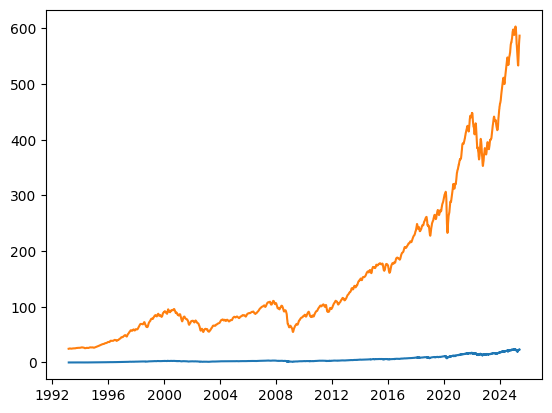

In [ ]:
plt.plot(df['asset_cumulative'])